# 1. Importing Data

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
plotly.tools.set_credentials_file(username='vvr', api_key='Ker155UU70wk3Ccz6iyM')
import plotly.plotly as py
import plotly.graph_objs as go

color = sns.color_palette("husl", 8)
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


%matplotlib inline

import squarify

import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
#from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
import re

In [2]:
df= pd.read_csv('train.csv')
data = pd.read_csv('train.csv')

data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


In [3]:
test = pd.read_csv('test.csv')
test.head(2)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.



,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects
0,p233245,5724a0c3ce11008366fff36dab4b943c,Ms.,CA,2016-04-27 13:45:41,Grades PreK-2,Music & The Arts,Visual Arts,Art Will Make You Happy!,My 2nd grade students are amazing! They are v...,My class is made up of 12 boys and 12 girls. ...,My second grade class will really benefit from...,The genorous donations to my project will make...,My students need a drying rack for their art p...,2
1,p096795,445619941dc7cbe81c7be109dc61a56a,Mrs.,SC,2016-04-28 12:43:56,Grades 3-5,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,My students are all very talented young indivi...,"We do a lot of small group, where the student ...",This project is very important to my classroom...,My students need Time Magazines for next year ...,1


In [4]:
data = pd.read_csv('train.csv')
data.append(test, ignore_index=True)
data.tail(2)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
182078,p136737,497ba7027394d6490d2d2b34af2db5fd,Mrs.,FL,2016-12-28 14:20:07,Grades PreK-2,Literacy & Language,Literacy,Can I go to the library?,I work with a group of wonderful second grade ...,Have you ever went to the library to find a go...,NaN,NaN,My students need 3 shelf organizers to have a ...,29,1
182079,p190772,337bc63eccf6f6ee26e727a1f18b80f4,Ms.,TX,2016-05-15 20:25:14,Grades 3-5,Literacy & Language,Literacy,Reader Leaders!,Balanced literacy was a mystery to me until a ...,"At the beginning of the school year, the readi...",My students will be able to listen to books re...,Donations to this project will help my student...,My students need a literacy listening center w...,1,1


In [5]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,182080,182080,p196833,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teacher_id,182080,104414,fa2f220b537e8653fb48878ebb38044d,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teacher_prefix,182076,5,Mrs.,95405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
school_state,182080,51,CA,25695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
project_submitted_datetime,182080,180439,2016-09-01 00:00:03,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
project_grade_category,182080,4,Grades PreK-2,73890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
project_subject_categories,182080,51,Literacy & Language,39257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
project_subject_subcategories,182080,407,Literacy,15775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
project_title,182080,164282,Flexible Seating,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
project_essay_1,182080,147689,As a teacher in a low-income/high poverty scho...,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Univariate Analysis

In [6]:
df.dtypes

id                                              object
teacher_id                                      object
teacher_prefix                                  object
school_state                                    object
project_submitted_datetime                      object
project_grade_category                          object
project_subject_categories                      object
project_subject_subcategories                   object
project_title                                   object
project_essay_1                                 object
project_essay_2                                 object
project_essay_3                                 object
project_essay_4                                 object
project_resource_summary                        object
teacher_number_of_previously_posted_projects     int64
project_is_approved                              int64
dtype: object

Text(0,0.5,'Count')

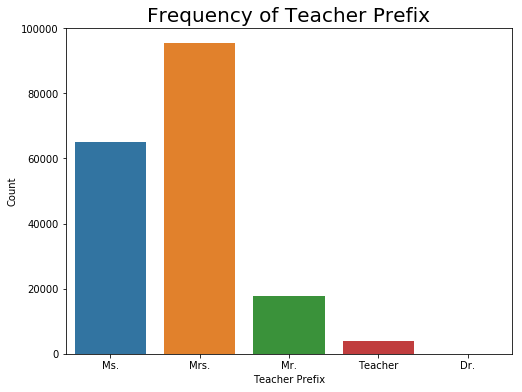

In [7]:
plt.figure(figsize = (8,6))
color = sns.color_palette("Set2", 8)
sns.countplot(df.teacher_prefix)
plt.title('Frequency of Teacher Prefix', loc = 'center', fontsize  = 20)
plt.xlabel('Teacher Prefix')
plt.ylabel('Count')

In [8]:
prefix = pd.DataFrame(df['teacher_prefix'].value_counts()).reset_index()
prefix.columns = ['teacher_prefix', 'count']
prefix = prefix.reset_index().drop('index', axis=1)
#print(prefix)

In [9]:
'''
import cufflinks as cf
import plotly.offline as offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pie=cf.datagen.pie()
prefix.iplot(kind='pie',labels='teacher_prefix',values='count')
'''

"\nimport cufflinks as cf\nimport plotly.offline as offline\nfrom plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot\npie=cf.datagen.pie()\nprefix.iplot(kind='pie',labels='teacher_prefix',values='count')\n"

Text(0,0.5,'Count')

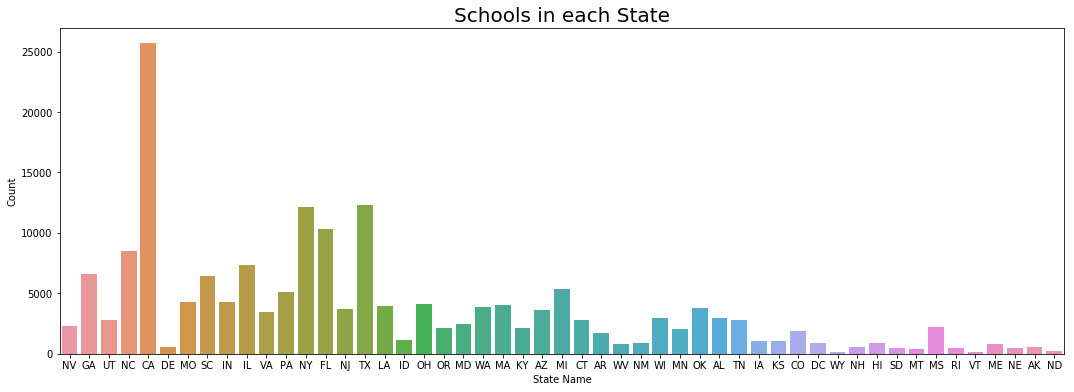

In [10]:
plt.figure(figsize = (18,6))
color = sns.color_palette("Set2", 8)
sns.countplot(df.school_state)
plt.title('Schools in each State', loc = 'center', fontsize  = 20)
plt.xlabel('State Name')
plt.ylabel('Count')

Text(0,0.5,'Count')

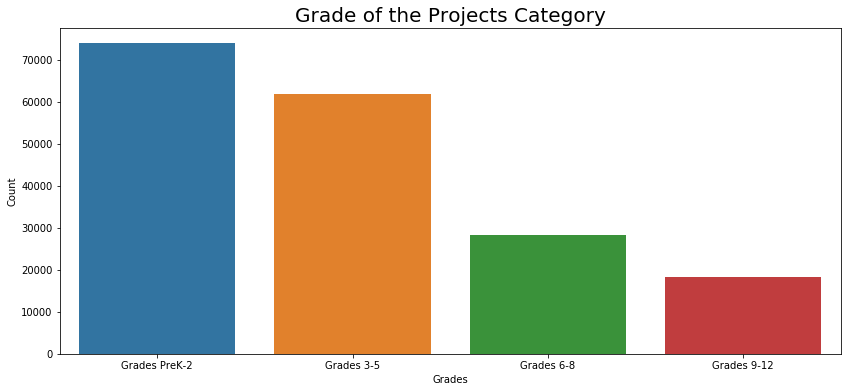

In [11]:
plt.figure(figsize = (14,6))
color = sns.color_palette("Set2", 8)
sns.countplot(df.project_grade_category)
plt.title('Grade of the Projects Category', loc = 'center', fontsize  = 20)
plt.xlabel('Grades')
plt.ylabel('Count')

Text(0,0.5,'Subject Category')

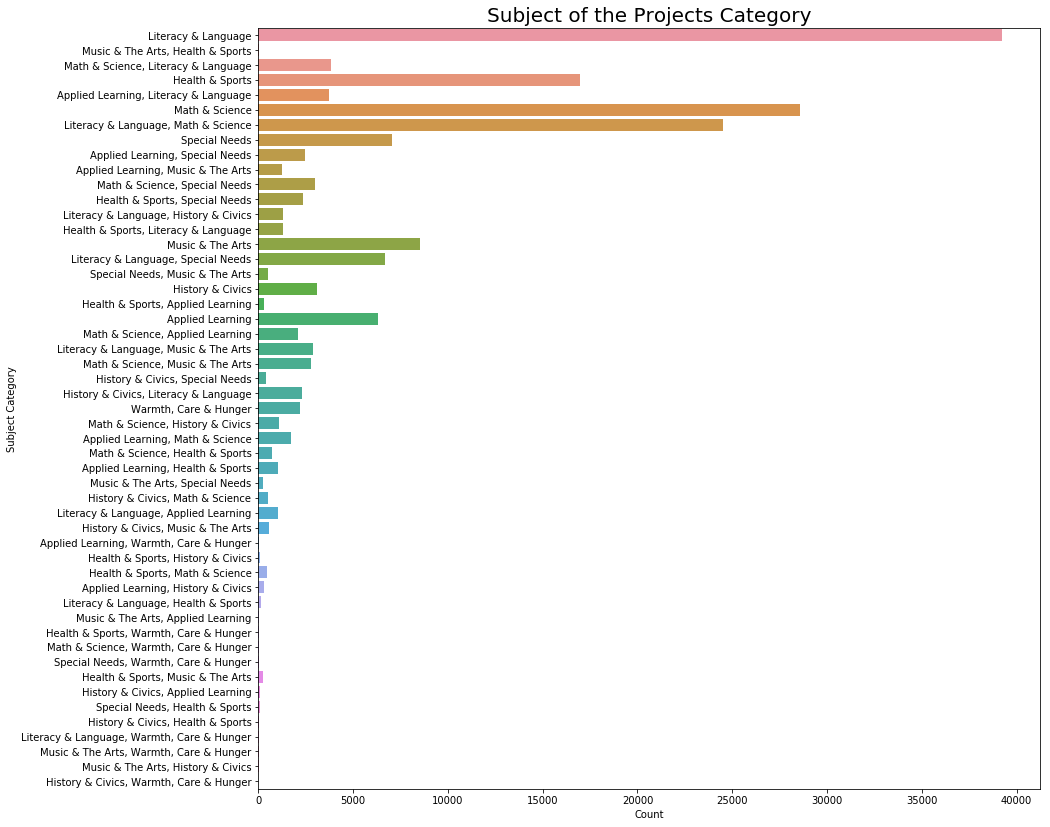

In [12]:
plt.figure(figsize = (14,14))
color = sns.color_palette("Set2", 8)
sns.countplot(y = 'project_subject_categories',data= df)
plt.title('Subject of the Projects Category', loc = 'center', fontsize  = 20)
plt.xlabel('Count')
plt.ylabel('Subject Category')

Text(0,0.5,'Subject Sub Category')

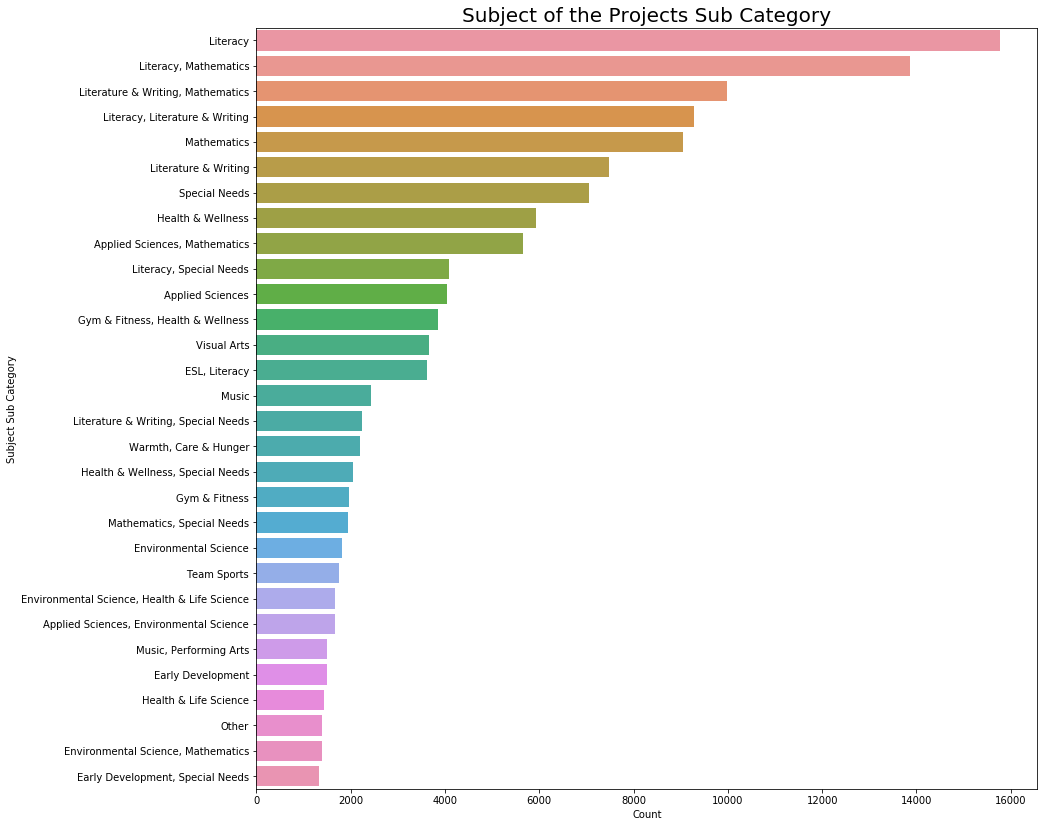

In [13]:
plt.figure(figsize = (14,14))
color = sns.color_palette("Set2", 8)
sns.countplot(y = 'project_subject_subcategories',data = df[df["project_subject_subcategories"].isin(df["project_subject_subcategories"].value_counts()[:30].index)],
                        order=df["project_subject_subcategories"].value_counts().iloc[:30].index)
plt.title('Subject of the Projects Sub Category', loc = 'center', fontsize  = 20)
plt.xlabel('Count')
plt.ylabel('Subject Sub Category')

Text(0,0.5,'Project titles')

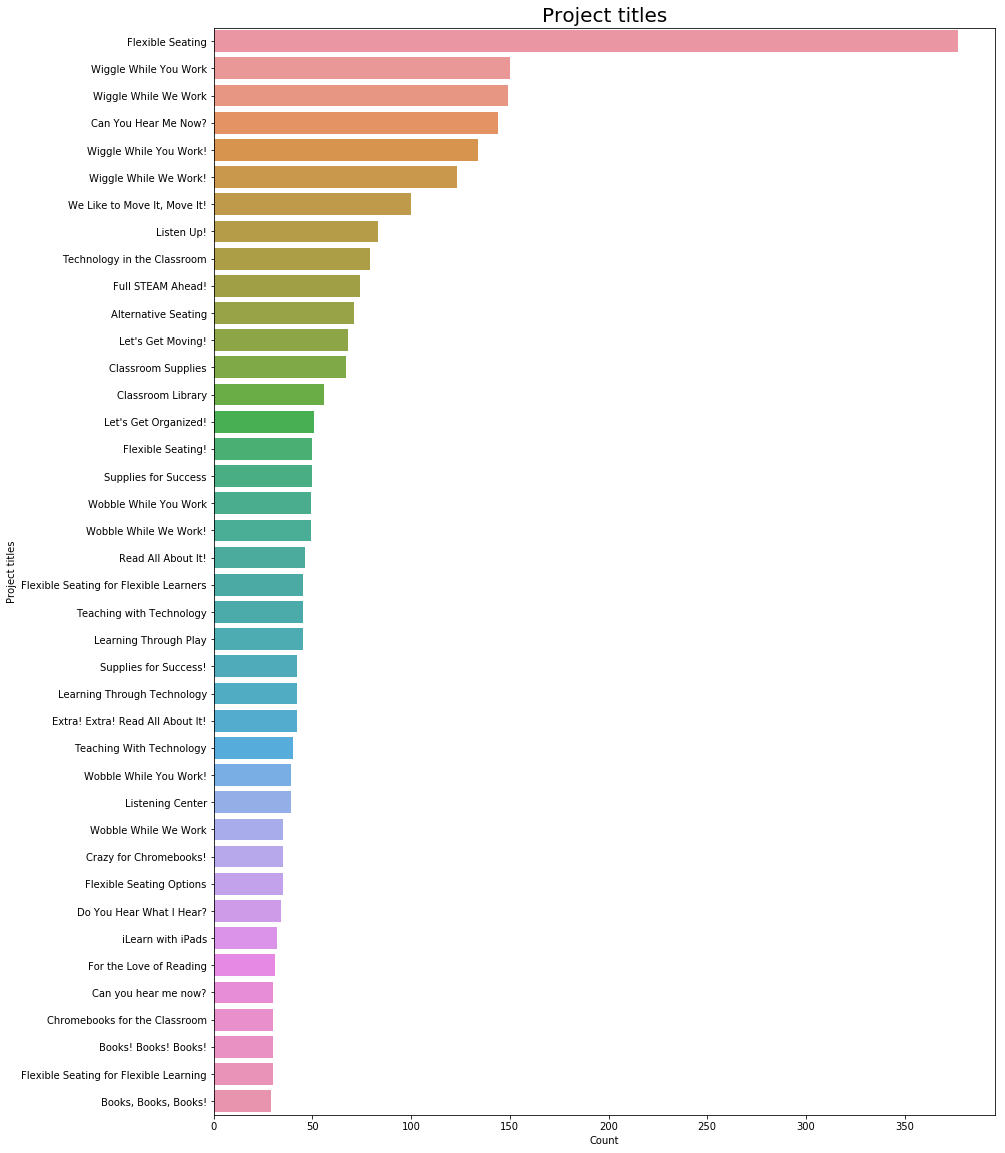

In [14]:
plt.figure(figsize = (14,20))
color = sns.color_palette("Set2", 8)
sns.countplot(y = 'project_title',data = df[df["project_title"].isin(df["project_title"].value_counts()[:40].index)],
                        order=df["project_title"].value_counts().iloc[:40].index)
plt.title('Project titles', loc = 'center', fontsize  = 20)
plt.xlabel('Count')
plt.ylabel('Project titles')

Text(0,0.5,'Project Summary')

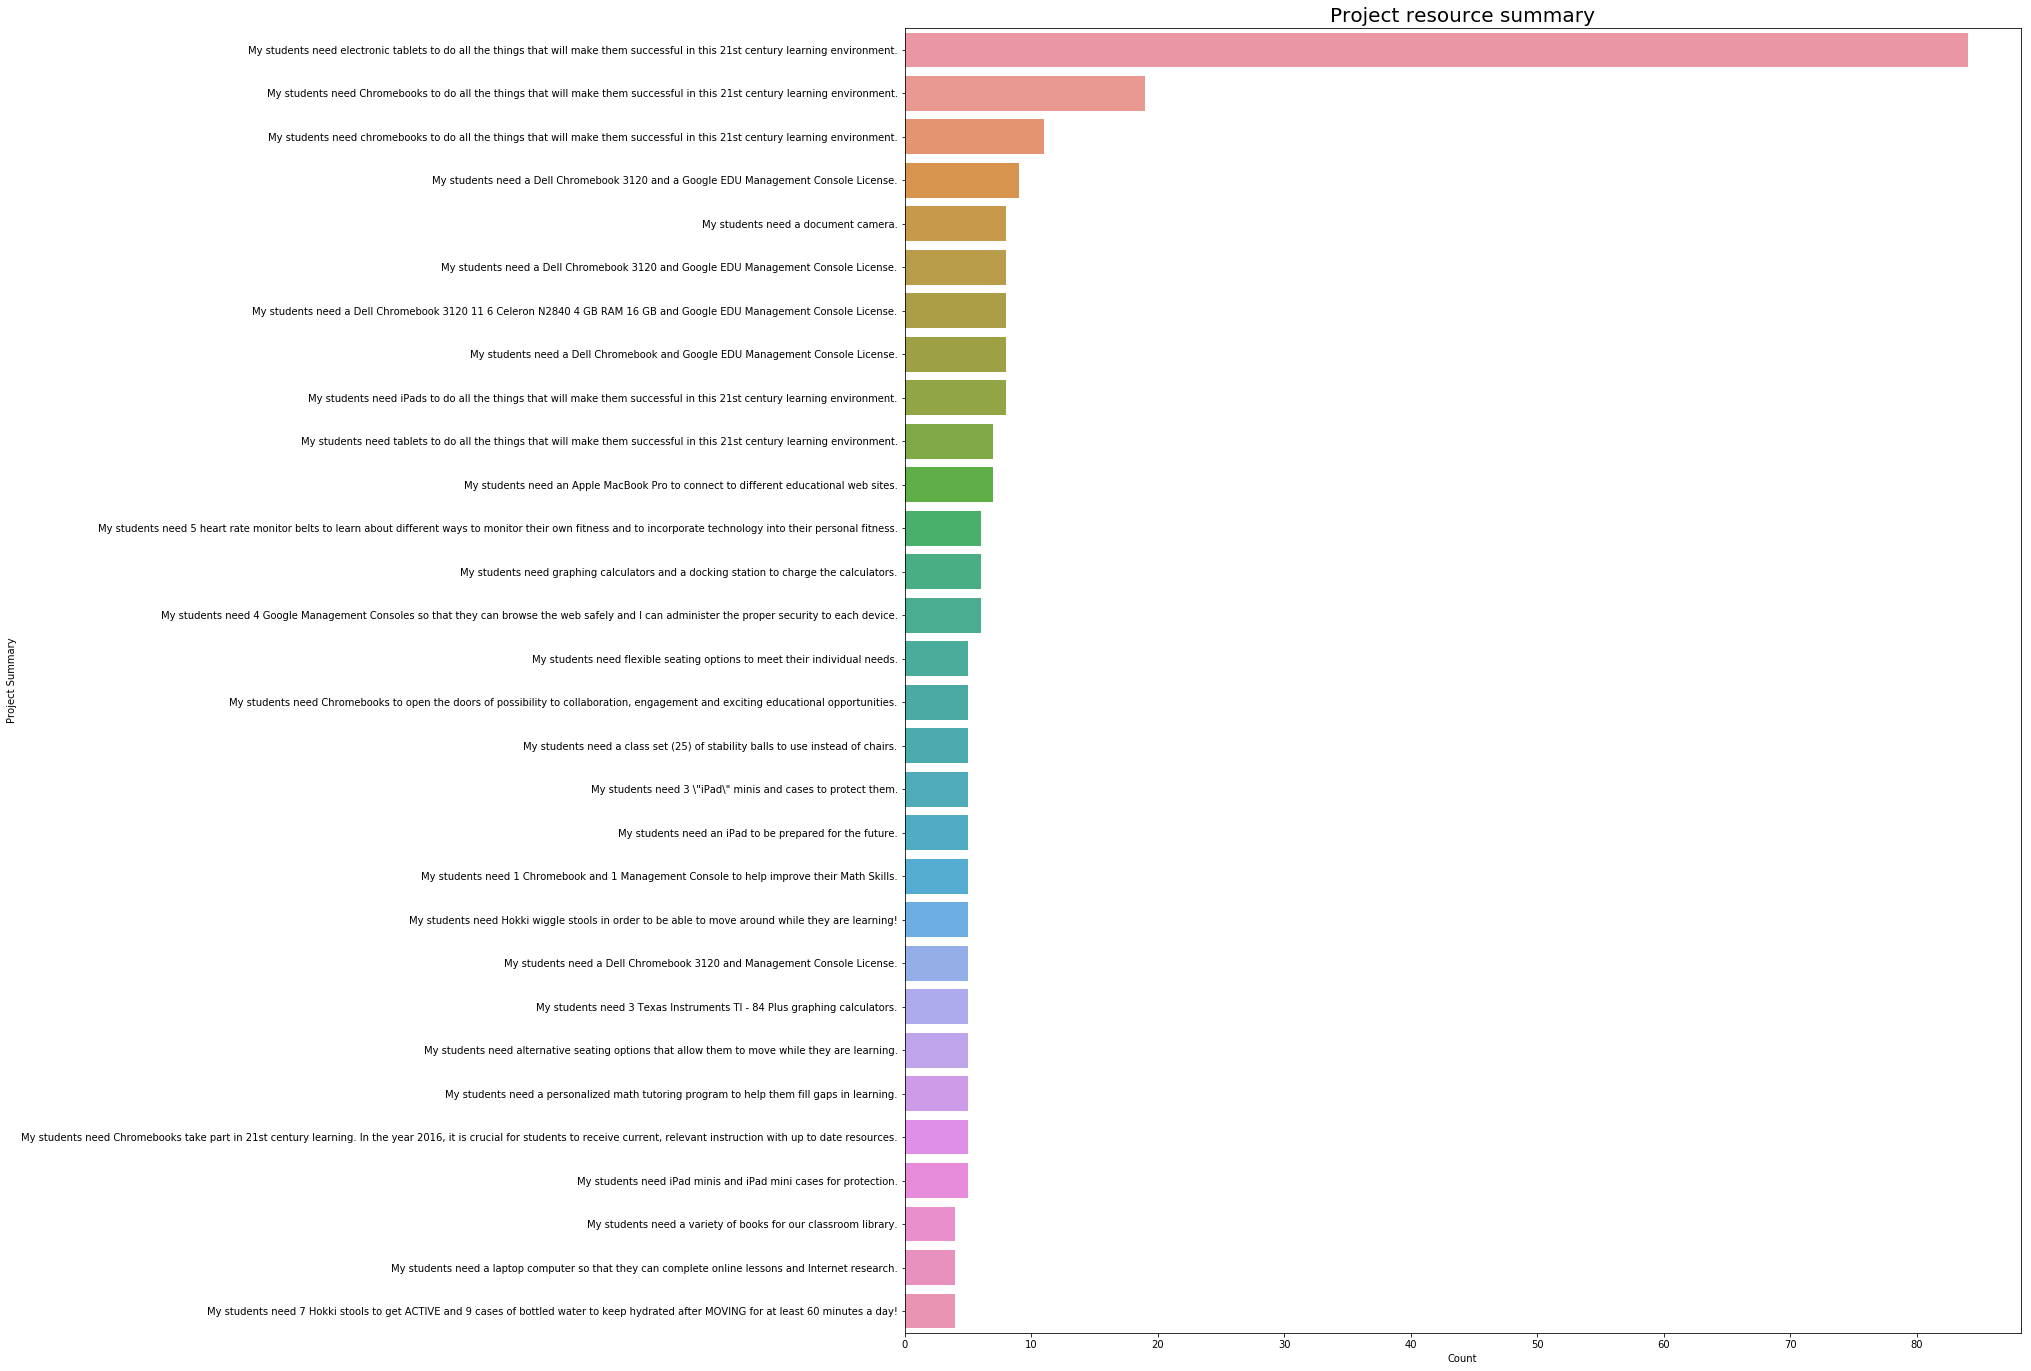

In [15]:

plt.figure(figsize = (20,24))
color = sns.color_palette("Set2", 8)
sns.countplot(y = 'project_resource_summary',data = df[df["project_resource_summary"].isin(df["project_resource_summary"].value_counts()[:30].index)],
                        order=df["project_resource_summary"].value_counts().iloc[:30].index)
plt.title('Project resource summary', loc = 'center', fontsize  = 20)
plt.xlabel('Count')
plt.ylabel('Project Summary')


Text(0,0.5,'Count')

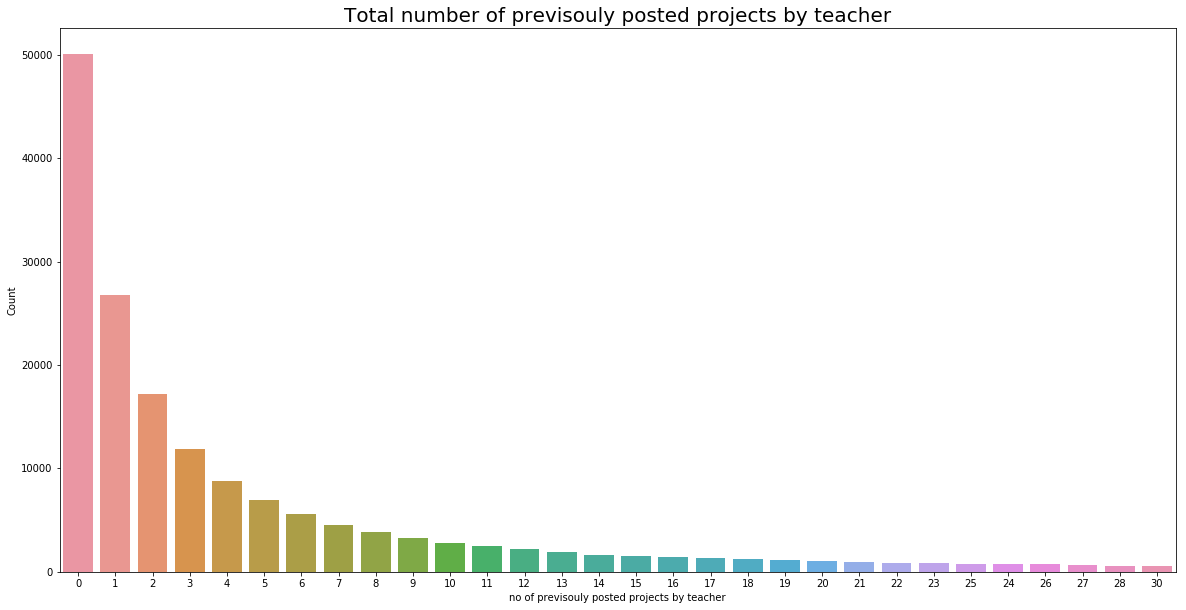

In [16]:

plt.figure(figsize = (20,10))
color = sns.color_palette("Set2", 8)

sns.countplot(x = 'teacher_number_of_previously_posted_projects',data = df[df["teacher_number_of_previously_posted_projects"].isin(df["teacher_number_of_previously_posted_projects"].value_counts()[:30].index)],
                        order=df["teacher_number_of_previously_posted_projects"].value_counts().iloc[:30].index)

#sns.distplot(df.teacher_number_of_previously_posted_projects, kde = False)
plt.title('Total number of previsouly posted projects by teacher', loc = 'center', fontsize  = 20)
plt.xlabel('no of previsouly posted projects by teacher')
plt.ylabel('Count')


In [17]:
approved = pd.DataFrame(df['project_is_approved'].value_counts()).reset_index()
approved.columns = ['project_is_approved', 'count']
approved = approved.reset_index().drop('index', axis=1)

In [18]:
'''
import cufflinks as cf
import plotly.offline as offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pie=cf.datagen.pie()
approved.iplot(kind='pie',labels='project_is_approved',values='count')
'''

"\nimport cufflinks as cf\nimport plotly.offline as offline\nfrom plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot\npie=cf.datagen.pie()\napproved.iplot(kind='pie',labels='project_is_approved',values='count')\n"

# 3. Bivariate Analysis

Teacher Prefix vs Acceptance rate

In [19]:
acc = df.groupby('teacher_prefix').project_is_approved.sum()
acc.columns = ['approved', 'count']
acc = acc.reset_index()
#acc.sort_values(project_is_approved)

acc.sort_values('project_is_approved', ascending =False, inplace = True)
acc.reset_index(inplace = True)
acc.drop('index', axis = 1)

acc['accepted'] = prefix['count'] - acc['project_is_approved']
acc.drop('index', axis = 1)


trace1 = go.Bar(
    x=prefix['teacher_prefix'],
    y=acc['project_is_approved'],
    name='Accepted'
)
trace2 = go.Bar(
    x=prefix['teacher_prefix'],
    y=acc['accepted'],
    name='Not Accepted'
)

data1 = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [20]:
grade = pd.DataFrame(df['project_grade_category'].value_counts()).reset_index()
grade.columns = ['project_grade', 'count']
grade = grade.reset_index().drop('index', axis=1)

acc2 = df.groupby('project_grade_category').project_is_approved.sum()
acc2.columns = ['approved', 'count']
acc2 = acc2.reset_index()

acc2.sort_values('project_is_approved', ascending =False, inplace = True)
acc2.reset_index(inplace = True)
acc2.drop('index', axis = 1)

acc2['accepted'] = grade['count'] - acc2['project_is_approved']
acc2.drop('index', axis = 1)

trace1 = go.Bar(
    x=grade['project_grade'],
    y=acc2['project_is_approved'],
    name='Accepted'
)
trace2 = go.Bar(
    x=grade['project_grade'],
    y=acc2['accepted'],
    name='Not Accepted'
)

data2 = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title = 'Grades vs Acceptance Rate'
)

fig = go.Figure(data=data2, layout=layout)
py.iplot(fig, filename='stacked-bar')


In [21]:
previous = pd.DataFrame(df['teacher_number_of_previously_posted_projects'].value_counts()).head(10).reset_index()
previous.columns = ['previous', 'count']
previous = previous.reset_index().drop('index', axis=1)

acc3 = df.groupby('teacher_number_of_previously_posted_projects').project_is_approved.sum().head(10)
acc3.columns = ['approved', 'count']
acc3 = acc3.reset_index()

acc3.sort_values('project_is_approved', ascending =False, inplace = True)
acc3.reset_index(inplace = True)
acc3.drop('index', axis = 1)

acc3['accepted'] = previous['count'] - acc3['project_is_approved']
acc3.drop('index', axis = 1)

trace1 = go.Bar(
    x=previous['previous'],
    y=acc3['project_is_approved'],
    name='Accepted'
)
trace2 = go.Bar(
    x=previous['previous'],
    y=acc3['accepted'],
    name='Not Accepted'
)

data3 = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title = 'Number of previous projects by teacher vs Acceptance Rate'
)

fig = go.Figure(data=data3, layout=layout)
py.iplot(fig, filename='stacked-bar')


In [22]:
df.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')

In [23]:
subcategory = pd.DataFrame(df['project_subject_subcategories'].value_counts()).head(10).reset_index()
subcategory.columns = ['subcategory', 'count']
subcategory = subcategory.reset_index().drop('index', axis=1)

acc4 = df.groupby('project_subject_subcategories').project_is_approved.sum().head(10)
acc4.columns = ['approved', 'count']
acc4 = acc4.reset_index()

acc4.sort_values('project_is_approved', ascending =False, inplace = True)
acc4.reset_index(inplace = True)
acc4.drop('index', axis = 1)

acc4['accepted'] = subcategory['count'] - acc4['project_is_approved']
acc4.drop('index', axis = 1)

trace1 = go.Bar(
    x=subcategory['subcategory'],
    y=acc4['project_is_approved'],
    name='Accepted'
)
trace2 = go.Bar(
    x=subcategory['subcategory'],
    y=acc4['accepted'],
    name='Not Accepted'
)

data4 = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title = 'Sub Category of Projects vs Acceptance Rate'
)

fig = go.Figure(data=data4, layout=layout)
py.iplot(fig, filename='stacked-bar')


Natural Language Processing

Dealing with the word Counts

In [24]:
df['count_1'] = df['project_essay_1'].apply(lambda x : len(str(x).split(' ')))

df['count_2'] = df['project_essay_2'].apply(lambda x : len(str(x).split(' ')))

df['count_3'] = df['project_essay_3'].apply(lambda x : len(str(x).split(' ')))
df['count_4'] = df['project_essay_4'].apply(lambda x : len(str(x).split(' ')))
df['count_s'] = df['project_resource_summary'].apply(lambda x : len(str(x).split(' ')))

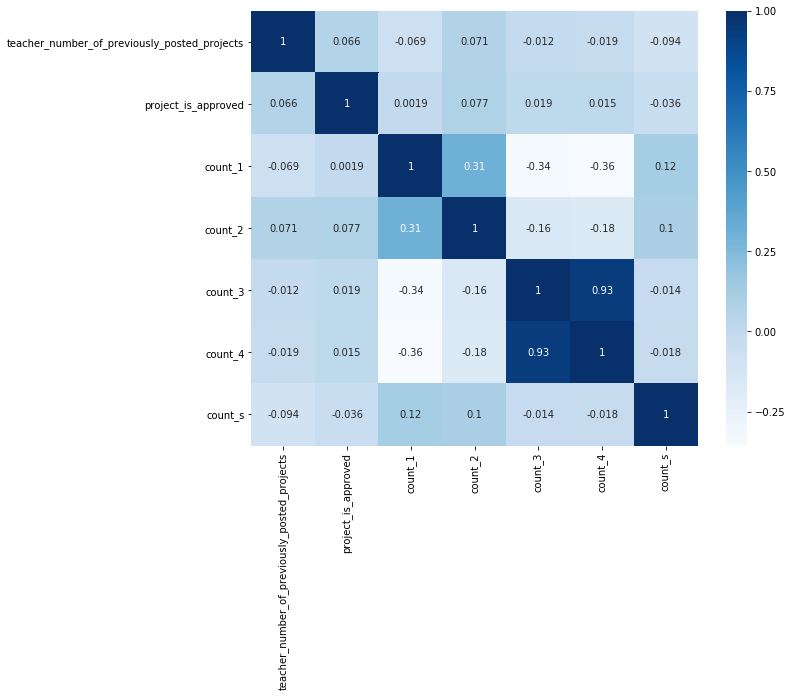

In [25]:
#x = df.groupby('project_is_approved')
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap="Blues")

"\nsns.distplot(afteroutliers5['count_s'],kde = False, ax = ax4)\nax4.set_xlabel('word count of project Summary')\nax4.set_ylabel('Frequency')\nax4.set_title('Word Count of Project  Summary')\n\nplt.tight_layout()\n"

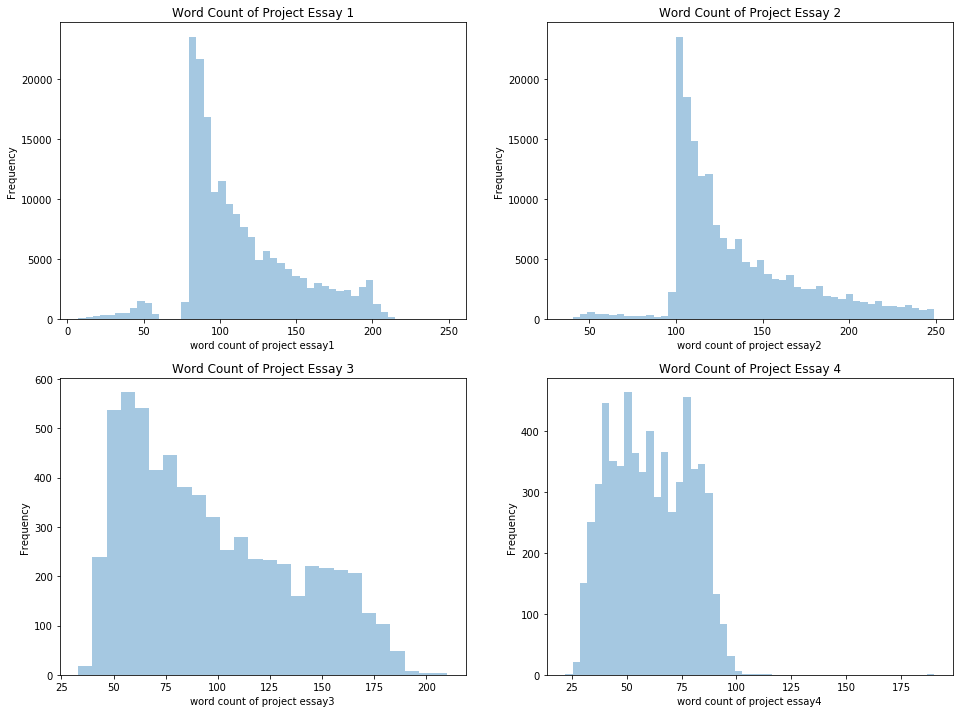

In [26]:
afteroutliers =  df[(df.count_1>1) & (df.count_1 <250)]
afteroutliers2 = df[(df.count_2>1) & (df.count_2 <250)]
afteroutliers3 = df[(df.count_3>1) & (df.count_3 <250)]
afteroutliers4 = df[(df.count_4>1) & (df.count_4 <250)]
afteroutliers5 = df[(df.count_s>1) & (df.count_s <250)]

f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2,figsize = (16, 12))


sns.distplot(afteroutliers['count_1'],kde = False, ax = ax0)

ax0.set_xlabel('word count of project essay1')
ax0.set_ylabel('Frequency')
ax0.set_title('Word Count of Project Essay 1')


sns.distplot(afteroutliers2['count_2'],kde = False, ax = ax1)
ax1.set_xlabel('word count of project essay2')
ax1.set_ylabel('Frequency')
ax1.set_title('Word Count of Project Essay 2')


sns.distplot(afteroutliers3['count_3'],kde = False, ax = ax2)
ax2.set_xlabel('word count of project essay3')
ax2.set_ylabel('Frequency')
ax2.set_title('Word Count of Project Essay 3')


sns.distplot(afteroutliers4['count_4'],kde = False, ax = ax3)
ax3.set_xlabel('word count of project essay4')
ax3.set_ylabel('Frequency')
ax3.set_title('Word Count of Project Essay 4')

'''
sns.distplot(afteroutliers5['count_s'],kde = False, ax = ax4)
ax4.set_xlabel('word count of project Summary')
ax4.set_ylabel('Frequency')
ax4.set_title('Word Count of Project  Summary')

plt.tight_layout()
'''

In [27]:
wordcount = pd.DataFrame(afteroutliers['count_1'].value_counts()).head(10).reset_index()
wordcount.columns = ['essay1', 'count']
wordcount = wordcount.reset_index().drop('index', axis=1)


acc5 = afteroutliers.groupby('count_1').project_is_approved.sum().head(10)
acc5.columns = ['approved', 'count']
acc5 = acc5.reset_index()

acc5.sort_values('project_is_approved', ascending =False, inplace = True)
acc5.reset_index(inplace = True)
acc5.drop('index', axis = 1)

acc5['accepted'] = wordcount['count'] - acc5['project_is_approved']
acc5.drop('index', axis = 1, inplace = True)

trace1 = go.Bar(
    x=wordcount['essay1'],
    y=acc5['project_is_approved'],
    name='Accepted'
)
trace2 = go.Bar(
    x=wordcount['essay1'],
    y=acc5['accepted'],
    name='Not Accepted'
)

data6 = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title = 'Wordcount of Essay1 vs Accepted Rate'
)

fig = go.Figure(data=data6, layout=layout)
py.iplot(fig, filename='stacked-bar')


In [28]:
wordcount2 = pd.DataFrame(afteroutliers2['count_2'].value_counts()).head(10).reset_index()
wordcount2.columns = ['essay2', 'count']
wordcount2 = wordcount2.reset_index().drop('index', axis=1)


acc6 = afteroutliers2.groupby('count_2').project_is_approved.sum().head(10)
acc6.columns = ['approved', 'count']
acc6 = acc6.reset_index()

acc6.sort_values('project_is_approved', ascending =False, inplace = True)
acc6.reset_index(inplace = True)
acc6.drop('index', axis = 1)

acc6['accepted'] = wordcount['count'] - acc6['project_is_approved']
acc6.drop('index', axis = 1, inplace = True)

trace1 = go.Bar(
    x=wordcount2['essay2'],
    y=acc6['project_is_approved'],
    name='Accepted'
)
trace2 = go.Bar(
    x=wordcount2['essay2'],
    y=acc6['accepted'],
    name='Not Accepted'
)

data7 = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title = 'Wordcount of Essay 2 vs Acceptance Rate'
)

fig = go.Figure(data=data7, layout=layout)
py.iplot(fig, filename='stacked-bar')


Feature Engineering

We will add the columns of essay1, essay2, essay3 and Summary into one column by filling NAN values with unknown.

In [29]:
data['project_essay_3'].fillna('UK',inplace = True)
data['project_essay_4'].fillna('UK',inplace = True)



In [30]:
data['essay'] = data['project_essay_1'] + data['project_essay_2'] + data['project_essay_3'] +data['project_essay_4'] + data['project_resource_summary']


In [31]:
data.drop(['project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4','project_resource_summary'], axis =1, inplace = True)


In [32]:
def pir(data):
    t = data.text.str.split(expand=True).stack()
    return t.loc[t.str.len() >= 4].groupby(level=0).apply(' '.join)
data['essay'] = data['essay'].str.findall('\w{4,}').str.join(' ')
#data.sample()

Removing Stop words in the column ESSAY

In [33]:
stop = stopwords.words('english')
#data['essay'].str.findall('\w{4,}').str.join(' ')
data['essay'] = data['essay'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#data['essay'].sample()

In [34]:
data['count'] = data['essay'].str.len()

In [35]:
data['project_submitted_datetime'] = pd.to_datetime(data['project_submitted_datetime']) 
data['project_submitted_datetime'] = data['project_submitted_datetime'].map(lambda x: x.strftime('%Y-%m-%d'))


Stemming

In [36]:
#Train and Test Split

In [37]:
data['essay'].head()

0    Most kindergarten students come income househo...
1    elementary school culturally rich school diver...
2    Hello name Brotherton teach grade Ascent Acade...
3    students greatest students socially economical...
4    students athletes students interested health p...
Name: essay, dtype: object

In [38]:
X = data.drop(['project_is_approved','project_title'], axis =1)
y = data['project_is_approved']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Label Encoding

In [40]:
# Label encoding
#copied
#thanks
#https://www.kaggle.com/jmbull/xtra-credit-xgb-lgb-w-tfidf-feature-stacking


cols = [
    'teacher_id', 
    'teacher_prefix', 
    'school_state', 
    'project_grade_category', 
    'project_subject_categories', 
    'project_subject_subcategories'
]

for c in (cols):
    le = LabelEncoder()
    le.fit(data[c].astype(str))
    
    X_train[c] = le.transform(X_train[c].astype(str))
    X_test[c] = le.transform(X_test[c].astype(str))
    


c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



For Words We will use TFID vectorizer

In [41]:
'''
X_train['essay'] = X_train['essay'].apply(lambda x: ' '.join(x))
X_test['essay'] = X_test['essay'].apply(lambda x: ' '.join(x))
'''

"\nX_train['essay'] = X_train['essay'].apply(lambda x: ' '.join(x))\nX_test['essay'] = X_test['essay'].apply(lambda x: ' '.join(x))\n"

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
X_train['essay'] =  v.fit_transform(X_train['essay']).toarray()
X_test['essay']  = v.fit_transform(X_test['essay']).toarray()

MemoryError: 

# 4. Predicting Model

In [ ]:
X_train.sample()